In [2]:
# Import matplotlib and setup the figures to display within the notebook
# %matplotlib inline # - no longer needed
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

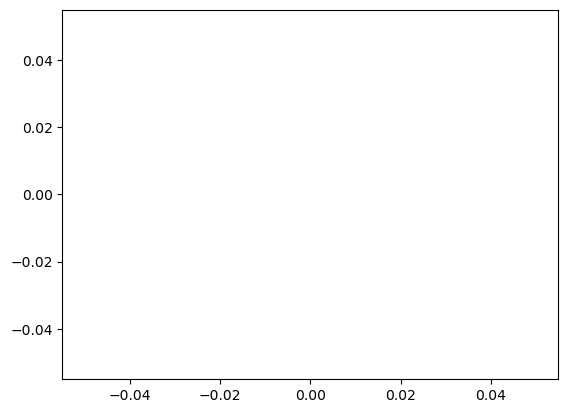

In [15]:
# With the semi-colon
plt.plot();

# You could use plt.show() if you want
# plt.plot()
# plt.show()

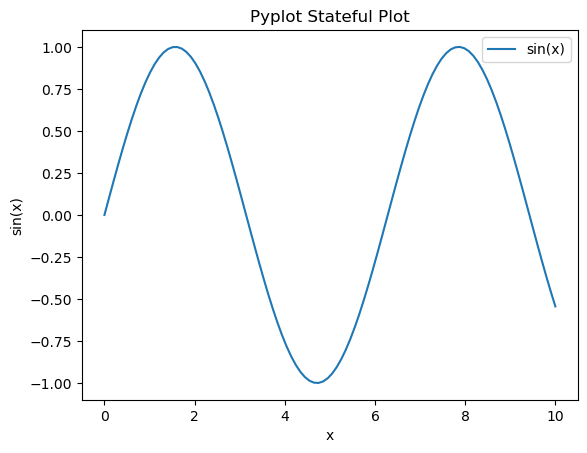

In [12]:
# First method - pyplot API
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y, label='sin(x)')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Pyplot Stateful Plot')
plt.legend()
plt.show()

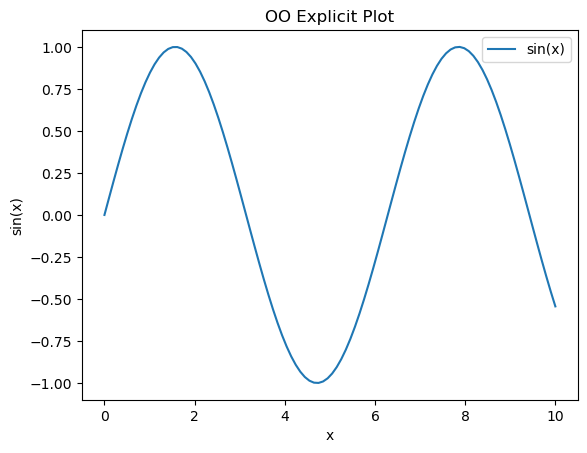

In [14]:
# Second method: Object-oriented API - recommended method!
x = np.linspace(0, 10, 100)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y, label='sin(x)')
ax.set_xlabel('x')
ax.set_ylabel('sin(x)')
ax.set_title('OO Explicit Plot')
ax.legend()
plt.show()